In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
def iteration(y0,dy0,x,h):
    f = lambda x,y, dy: 2 - 6*x + 2*x**3 + (x**2-3)*math.exp(x)*math.sin(x)*(1+math.cos(x))+math.cos(x)*(math.exp(x)+(x**2-1)+x**4-3*x**2)-(x**2-3)*y*math.cos(x)-dy*(x**2-3)
    y = y0 + h*dy0
    dy = dy0 + h*f(x,y0,dy0)
    return y, dy

In [20]:
def solve_(y0,dy0,x0,x1):
    points = [0.5,1,1.5,2,2.5,3]
    solutions = []
    y = []; x = x0
    h = 10**(-3)
    while x < x1:
        y0, dy0 = iteration(y0,dy0,x,h)
        y.append(y0)
        for i in points:
            if abs(x-i) < h/2: 
                solutions.append(y0)
        x += h
    return y0, y, solutions

In [21]:
Y0 = math.pi**2
h = 10**(-3)
F = lambda alpha: solve_(0,alpha,0,math.pi)[0] - Y0
dF = lambda alpha, h: (F(alpha + h)-F(alpha))/h

In [22]:
alpha0 = 1/math.pi
print(solve_(0,alpha0,0,math.pi)[0])
f = F(alpha0)
print(f)

-13.641001333562295
-23.510605734651655


In [23]:
alpha = alpha0
while(abs(f) > 10**(-12)):
    alpha = alpha - F(alpha)/dF(alpha,h)
    f = F(alpha)

In [24]:
solution,y, solutions = solve_(0,alpha,0,math.pi)
print(solution)

9.869604401089363


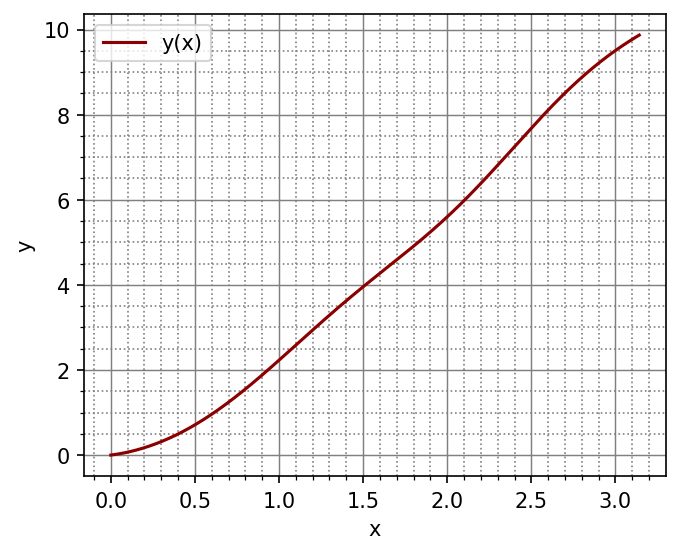

In [25]:
x = np.linspace(0,math.pi,len(y))
fig, ax = plt.subplots(figsize=(5, 4), dpi=150)
ax.plot(x,y, color = "darkred",label = "y(x)")
plt.minorticks_on()
plt.grid(which='major',
            color = 'grey', 
            linewidth = 0.7)
plt.grid(which='minor', 
            color = 'grey', 
            linestyle = ':')
plt.xlabel('x')
plt.ylabel('y')
ax.legend()

In [26]:
points = [0.5,1,1.5,2,2.5,3]
df = pd.DataFrame({"x": points, "y": solutions}).transpose()
print(df)

          0         1         2         3         4         5
x  0.500000  1.000000  1.500000  2.000000  2.500000  3.000000
y  0.711677  2.231063  3.956486  5.600631  7.686869  9.508005
